Histograms of righ and left halves of brain images

Chi-square from the right half: 6.827445060164208e-05
Chi-square from the left half: 3.6232325064397974e-05
Congragulations! Tumore Detected!


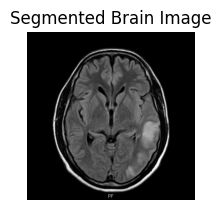

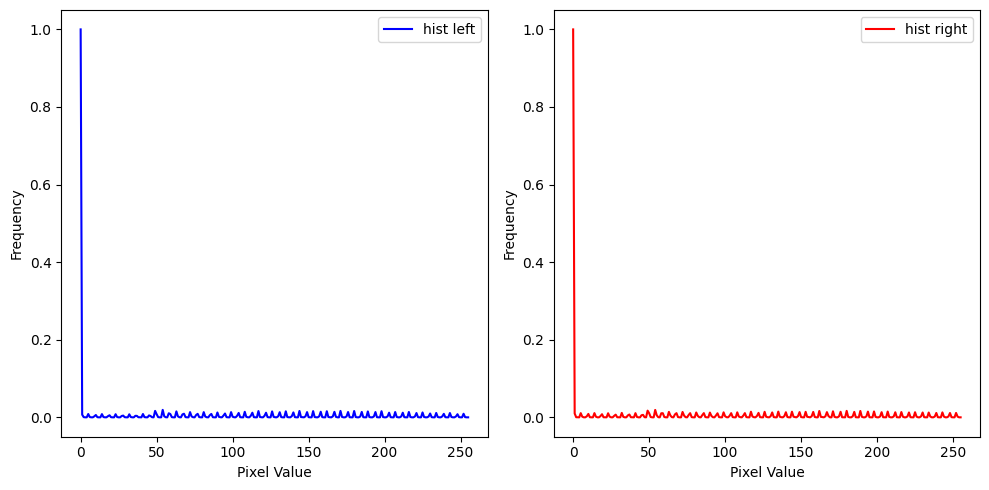

Chi-square from the right half: 8.957696638613425e-05
Chi-square from the left half: 4.493562844428233e-05
Congragulations! Tumore Detected!


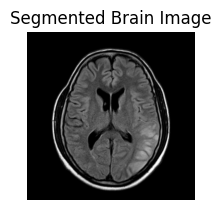

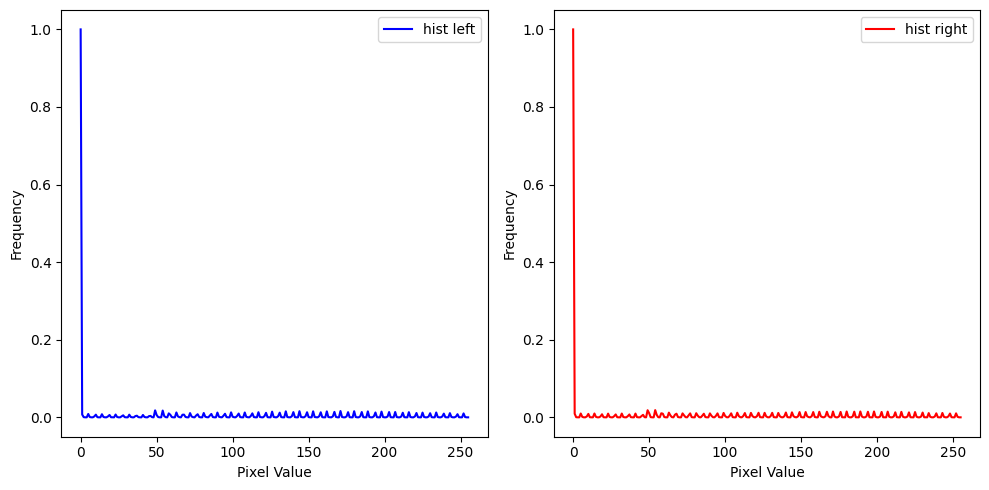

Chi-square from the right half: 8.838214698869664e-05
Chi-square from the left half: 4.903850350687258e-05
Congragulations! Tumore Detected!


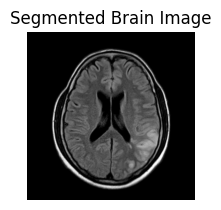

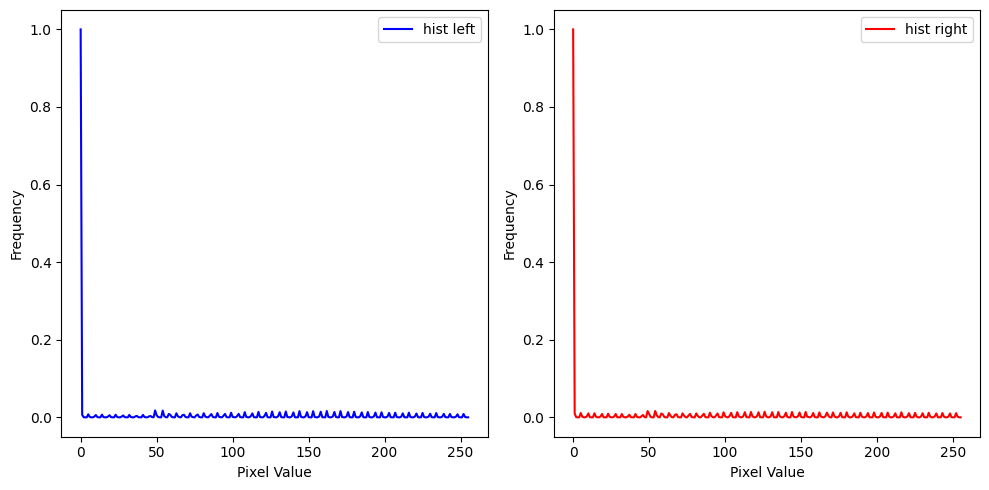

Chi-square from the right half: 9.260623338268801e-05
Chi-square from the left half: 4.101737938331551e-05
Congragulations! Tumore Detected!


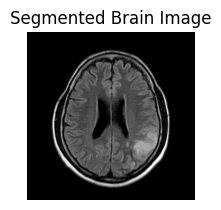

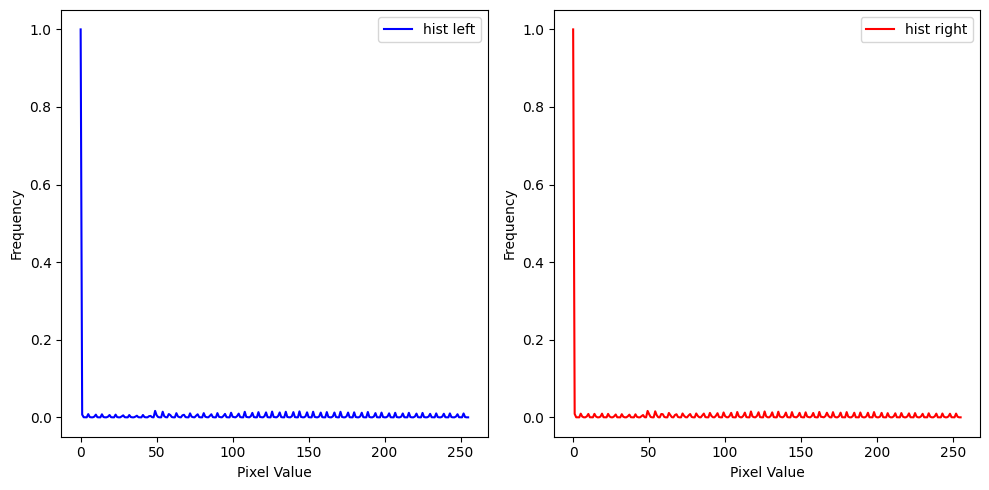

Chi-square from the right half: 8.113369484701736e-05
Chi-square from the left half: 4.2395425157317694e-05
Congragulations! Tumore Detected!


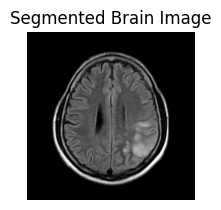

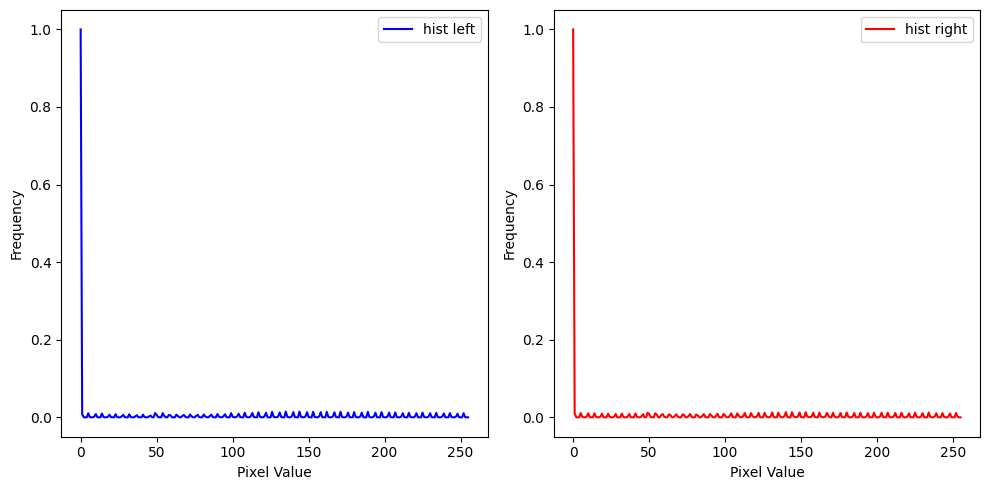

Chi-square from the right half: 8.414270772643305e-05
Chi-square from the left half: 3.8124756993500025e-05
Congragulations! Tumore Detected!


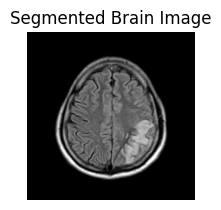

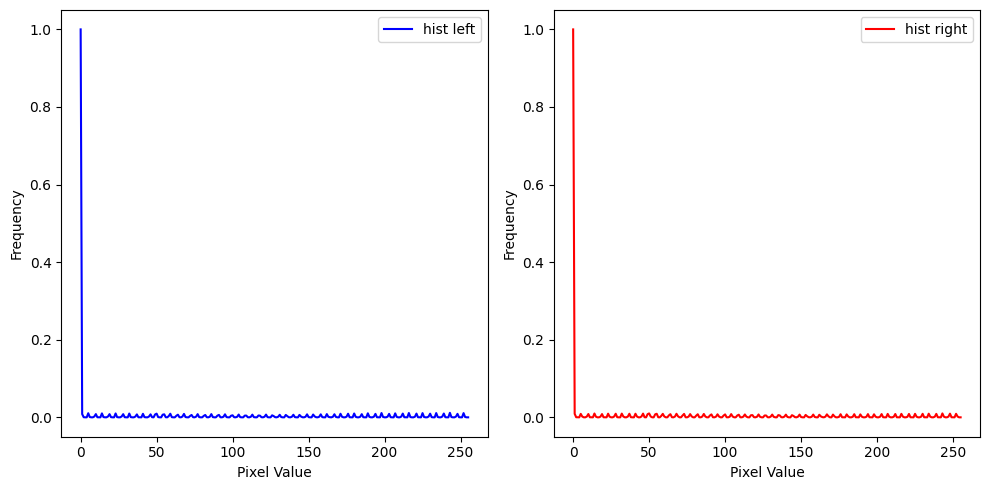

Chi-square from the right half: 5.158122354568302e-05
Chi-square from the left half: 2.9492553048888337e-05
Congragulations! Tumore Detected!


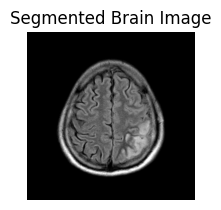

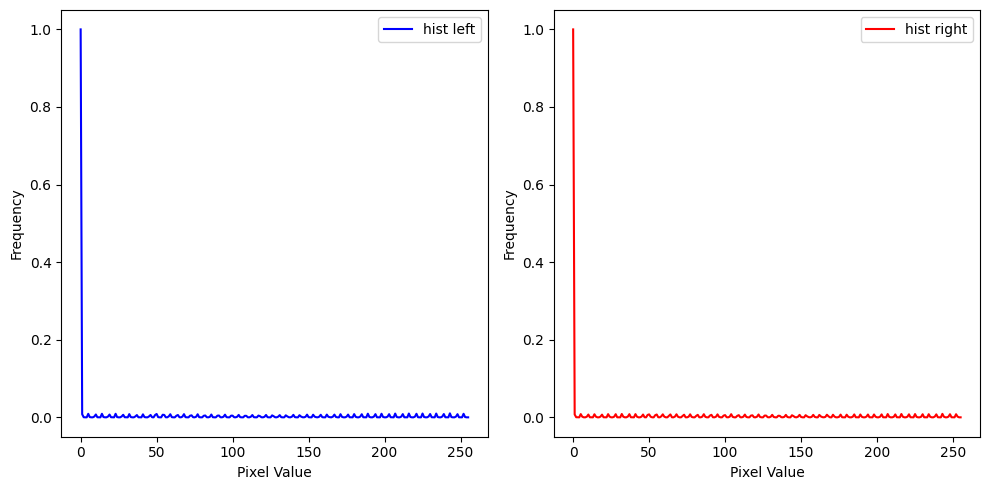

C:\Users\RayanTech\AppData\Local\Temp\ipykernel_4720\920668489.py:21: RuntimeWarning: overflow encountered in scalar negative
  highContrast[i, j] = -image[i, j] * alpha + beta


Chi-square from the right half: 0.00047981312875332955
Chi-square from the left half: 0.0004052034956197374
Congragulations! Tumore Detected!


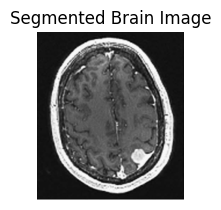

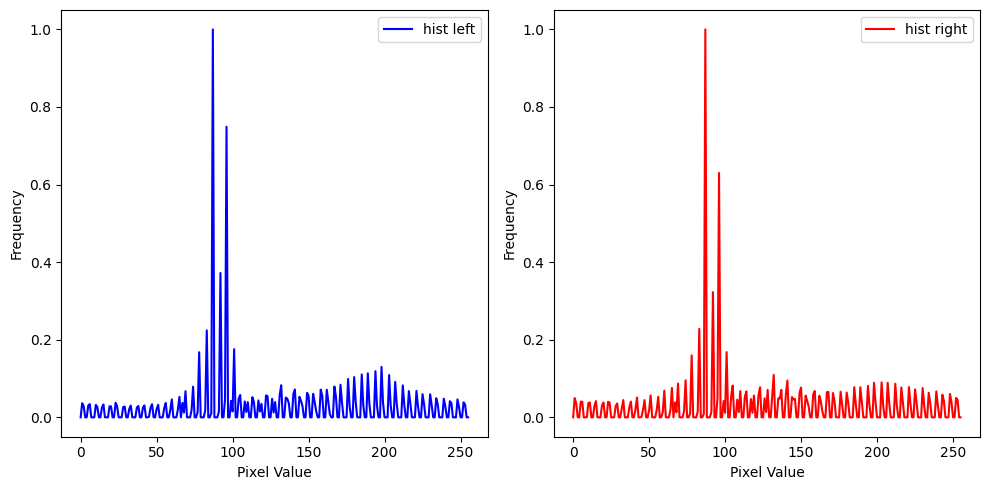

In [3]:
import cv2
import matplotlib.pyplot as plt
from skimage.exposure import match_histograms
import os
import numpy as np

directory = 'Images'

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        image = cv2.imread(f, cv2.IMREAD_GRAYSCALE)
        median = np.median(image)
        alpha = 4.5
        beta = 45

        highContrast = image.copy()
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                if image[i, j] < median:
                    highContrast[i, j] = -image[i, j] * alpha + beta                
                elif image[i, j] > median:
                    highContrast[i, j] = image[i, j] * alpha + beta
                else:
                    highContrast[i, j] = image[i, j]

        height, width = highContrast.shape
        left_half = highContrast[:, :width // 2]
        right_half = highContrast[:, width // 2:]

        left_hist = cv2.calcHist([left_half], [0], None, [256], [0, 256])
        cv2.normalize(left_hist, left_hist, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

        right_hist = cv2.calcHist([right_half], [0], None, [256], [0, 256])
        cv2.normalize(right_hist,right_hist, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

        matched_right = match_histograms(right_half, left_half)
        chi_square1 = cv2.compareHist(left_hist, right_hist, cv2.HISTCMP_CHISQR)
        chi_square2 = cv2.compareHist(right_hist, left_hist, cv2.HISTCMP_CHISQR)

        threshold = 30
        print(f"Chi-square from the right half: {chi_square1 / 1000}")
        print(f"Chi-square from the left half: {chi_square2 / 1000}")
        if abs(chi_square1 / 1000 + chi_square2 / 1000) < threshold:
            print("Congragulations! Tumore Detected!")

        plt.subplot(2, 2, 1)
        plt.imshow(image, cmap='gray')
        plt.title('Segmented Brain Image')
        plt.axis('off')

        plt.figure(figsize=(10, 5))

        plt.subplot(121)
        plt.plot(left_hist, color='blue', label='hist left')
        plt.xlabel('Pixel Value')
        plt.ylabel('Frequency')
        plt.legend()

        plt.subplot(122)
        plt.plot(right_hist, color='red', label='hist right')
        plt.xlabel('Pixel Value')
        plt.ylabel('Frequency')
        plt.legend()
        

        plt.tight_layout()
        plt.show()

Locate the Tumore

Report:
At first, it was not easy to detect the tumore, however, after contrast upgrading, the images got easier to process and for all cases the tumor was detected.
Regarding the comparisn criteria, I chose CHI-SQUARE which calculates the square difference of the images, divided by the first one and is suitable for this case, the way I applied it was to calculate it for both histograms and check whether the summation of them is less than a threshold, if so, they probably are less different than a particular level.

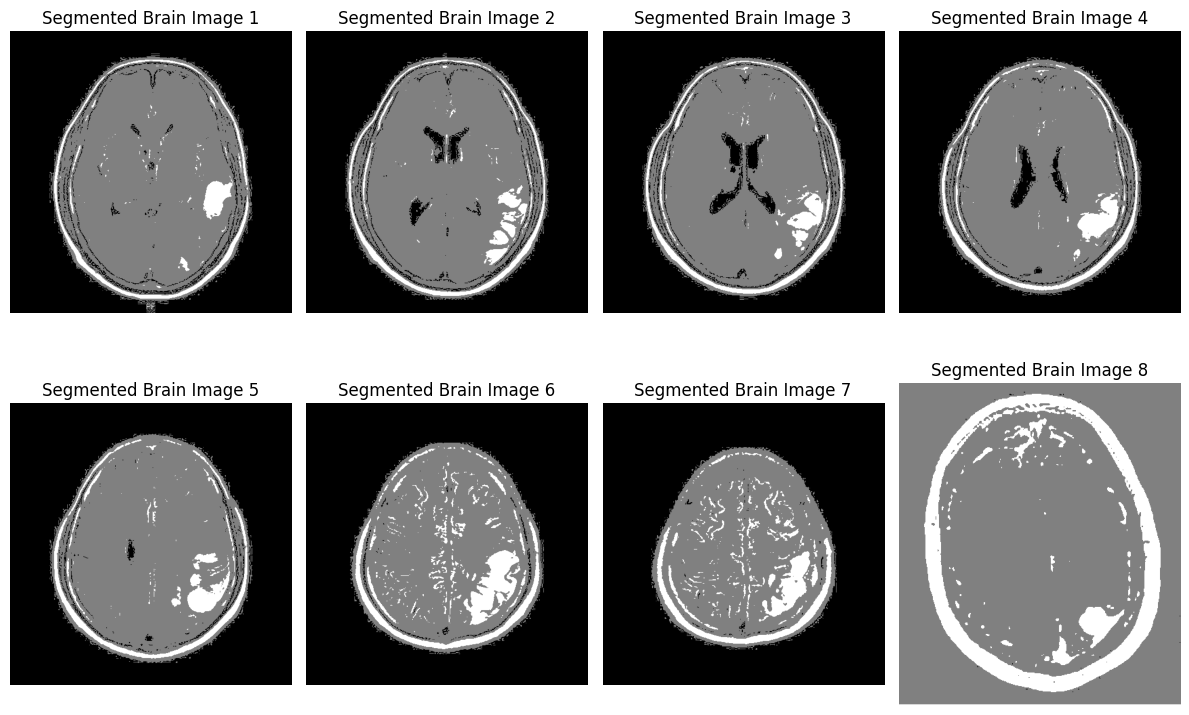

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

def preprocess_gray_image(image, threshold_values):
    gray_r = image.reshape(image.shape[0]*image.shape[1])
    for i in range(gray_r.shape[0]):
        if gray_r[i] > threshold_values[0]:
            gray_r[i] = 10
        elif gray_r[i] > threshold_values[1]:
            gray_r[i] = 6
        elif gray_r[i] > threshold_values[2]:
            gray_r[i] = 5
        else:
            gray_r[i] = 0
    return gray_r.reshape(image.shape[0], image.shape[1])

def load_images(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpeg') or filename.endswith('.jpg'):
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if image is not None:
                images.append(image)
    return images

threshhold = 0.01
images = load_images(directory)

plt.figure(figsize=(12, 8))
rows, cols = 2, 4

for i, gray in enumerate(images, start=1):
    plt.subplot(rows, cols, i)
    
    threshold_values = [127, 255, 0] 
    segmented = preprocess_gray_image(gray, threshold_values)

    height, width = segmented.shape[:2]
    left_half = segmented[:, :width // 2]
    right_half = segmented[:, width // 2:]
    mirrored_left_half = cv2.flip(left_half, 1)

    plt.imshow(segmented, cmap='gray')
    plt.title(f'Segmented Brain Image {i}')
    plt.axis('off')

plt.tight_layout()
plt.show()


Report:
I simply applied segmentation, so all pixels's numbers are distributed on 3 different ones (0, 127, and 255). Hence, the tumor parts will be easily detected. 